# Energy calculations

```{include} live.md
```

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import quad
from glcd import glsol,nat,SC

# straightforward determination of Gibbs energy

def G1(kappa,h0,L):
  A=nat(0,h0)
  B=nat(L,h0)
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**2+f**4/2+(df/kappa)**2+(a*f)**2+da**2-2*h0*da
  return quad(g,0,L)

The Gibbs free energy density in one dimension in scaled variables is:

$$G_1[\psi,\psi^*,\mathbf a]=\frac {H_c^2}{4\pi}\lambda_L^d\int d^d\mathbf r \left[-\psi^2+\frac 12\psi^4+\left(\frac{\psi'}{\kappa}\right)^2+(a\psi)^2+(a')^2-2ha'\right]=\frac {H_c^2}{4\pi}\lambda_L\int g_1dx$$



In the non-superconducting normal state (N) $\psi=0$ and $a'=h$, so $g_{N1}=-h^2$

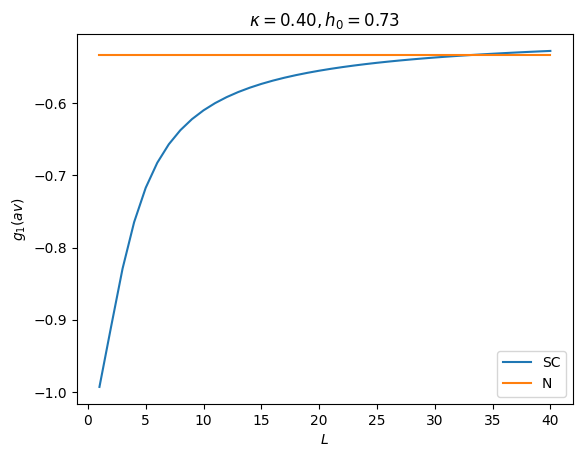

In [2]:
h0=0.73
kappa=.4
plot=[(G1(kappa,h0,L)[0]/L,-h0**2) for L in range(1,41)]
L=list(range(1,41))
plt.plot(L,plot,label=["SC","N"])
plt.xlabel("$L$")
plt.ylabel("$g_1(av)$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()

The approach to &lsquo;bulk&rsquo; behaviour is sllooowwww. This seems to enable superconducting behaviour to occur above the critical applied field for thin slabs. A sort of "surface tension" effect? Above $\kappa=0.4$ the code starts throwing wobblies?

## Partial integration

The Gibbs free energy can be partially integrated, as in {ref}`oned:energy`, to give:

$$G_1[\psi,\psi^*,\mathbf a]=\frac {H_c^2}{4\pi}\lambda_L^d\int d^d\mathbf r \left[-\frac 12\psi^4+(a')^2-2ha'\right]=\frac {H_c^2}{4\pi}\lambda_L\int g_1dx$$

For now I assume the partially integrated term $[\psi\psi'/\kappa^2]$ is zero. This is true both for the natural boundary condition ($\psi'=0$) and if the $\psi$ value is zero.

In [3]:
def G1A(kappa,h0,L):
  A=nat(0,h0)
  B=nat(L,h0)
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**4/2+da**2-2*h0*da
  return quad(g,0,L)

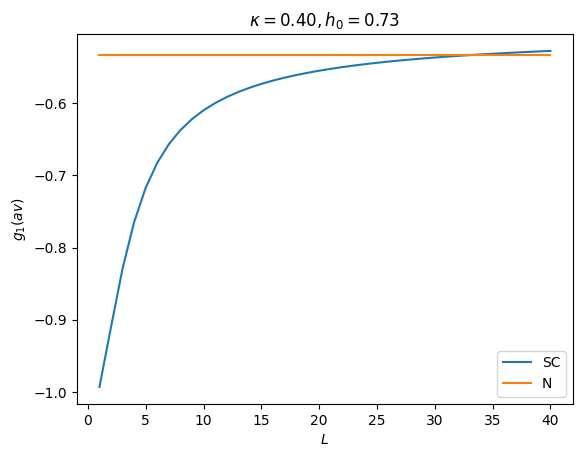

In [4]:
h0=0.73
kappa=.4
plot=[(G1A(kappa,h0,L)[0]/L,-h0**2) for L in range(1,41)]
L=list(range(1,41))
plt.plot(L,plot,label=["SC","N"])
plt.xlabel("$L$")
plt.ylabel("$g_1(av)$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()

(-6.011622517154966, 9.387675553819698e-09) (-6.011484042148972, 8.176998485933416e-08)


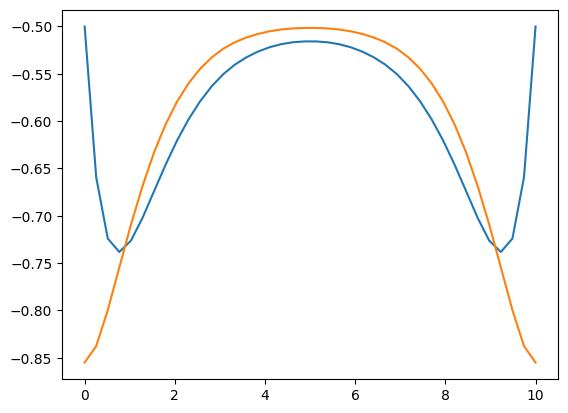

In [5]:
# Comparing the densities

def g1(kappa,h0,L):
  A=nat(0,h0)
  B=nat(L,h0)
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**2+f**4/2+(df/kappa)**2+(a*f)**2+da**2-2*h0*da
  X=np.linspace(0,L,40)
  plt.plot(X,g(X))

def g1A(kappa,h0,L):
  A=nat(0,h0)
  B=nat(L,h0)
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**4/2+da**2-2*h0*da
  X=np.linspace(0,L,40)
  plt.plot(X,g(X))

g1(0.5,.7,10)
g1A(0.5,.7,10)
print(G1(0.5,.7,10),G1A(0.5,.7,10)) # almost the same but not to the given tolerance? Of course, the GL "solutions" are not exact either!

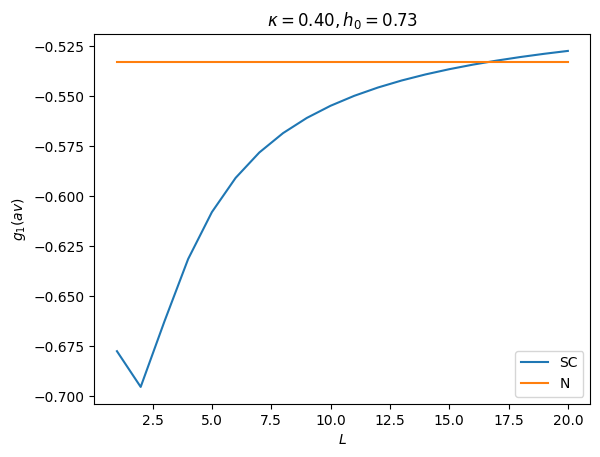

In [6]:
def G1ABA(kappa,h0,A,B):
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**4/2+da**2-2*h0*da  
  return quad(g,A[0],B[0])

h0=0.73
kappa=.4
L=list(range(1,21))
plot=[(G1ABA(kappa,h0,nat(0,h0),SC(l))[0]/l,-h0**2) for l in L]
plt.plot(L,plot,label=["SC","N"])
plt.xlabel("$L$")
plt.ylabel("$g_1(av)$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()

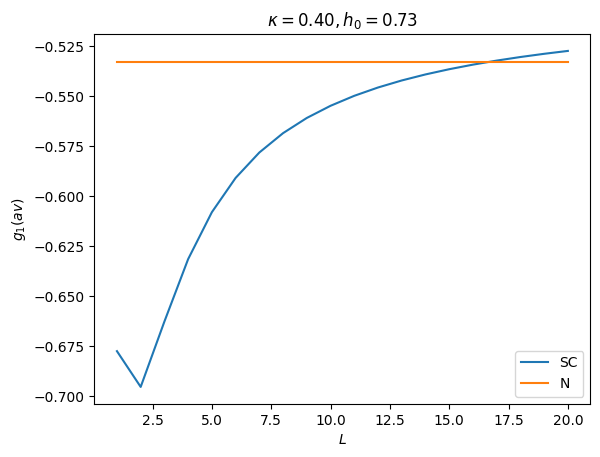

In [7]:
def G1AB(kappa,h0,A,B):
  sol=glsol(kappa,A,B)
  def g(x):
    f,df,a,da=sol.sol(x)
    return -f**2+f**4/2+(df/kappa)**2+(a*f)**2+da**2-2*h0*da 
  return quad(g,A[0],B[0])

h0=0.73
kappa=.4
L=list(range(1,21))
plot=[(G1AB(kappa,h0,nat(0,h0),SC(l))[0]/l,-h0**2) for l in L]
plt.plot(L,plot,label=["SC","N"])
plt.xlabel("$L$")
plt.ylabel("$g_1(av)$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()

The original form has a kink near the beginning. Is this due to SCP not being &lsquo;natural&rsquo; for such short ranges?

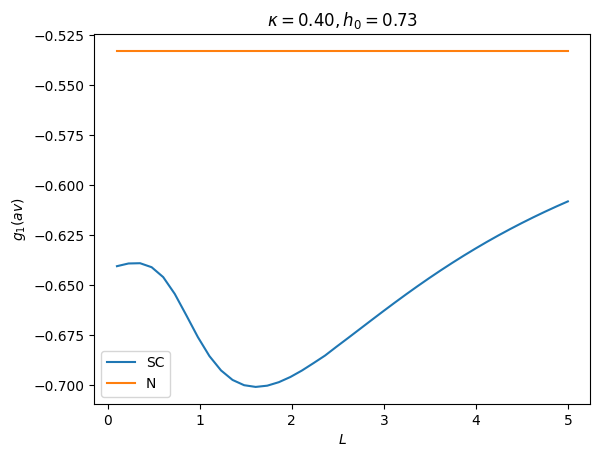

In [8]:
# Looking more closely at the kink.

h0=0.73
kappa=.4
L=np.linspace(0.1,5,40)
plot=[(G1AB(kappa,h0,nat(0,h0),SC(l))[0]/l,-h0**2) for l in L]
plt.plot(L,plot,label=["SC","N"])
plt.xlabel("$L$")
plt.ylabel("$g_1(av)$")
plt.title(f"$\kappa={kappa:.2f}, h_0={h0:.2f}$")
plt.legend()
plt.show()